In [51]:
import numpy as np
from sklearn.datasets import load_digits

# Загружаем весь набор данных MNIST
digits = load_digits()

# Определяем общее количество образцов
total_samples = len(digits.data)

# Выбираем случайные 1000 индексов
random_indices = np.random.choice(total_samples, size=1000, replace=False)

# Извлекаем данные и метки по выбранным индексам
data_by_index = digits.data[random_indices]
target_by_index = digits.target[random_indices]

print("Размерность данных:", data_by_index.shape)
print("Размерность меток:", target_by_index.shape)

Размерность данных: (1000, 64)
Размерность меток: (1000,)


In [52]:
import numpy as np
from sklearn.datasets import load_digits

# Разделяем данные по классам (цифрам)
data_by_label = {}
for i in range(10):
    data_by_label[i] = data_by_index[target_by_index == i]
# Вычисляем среднее изображение для каждого класса
avg_images = {}
for label, data in data_by_label.items():
    avg_images[label] = np.mean(data, axis=0)

print(avg_images[2].reshape(8,8))#Среднее значение для 2

[[0.00000000e+00 1.11111111e+00 9.69696970e+00 1.41919192e+01
  9.97979798e+00 2.47474747e+00 1.21212121e-01 0.00000000e+00]
 [2.02020202e-02 5.53535354e+00 1.36161616e+01 1.21515152e+01
  1.28484848e+01 5.71717172e+00 4.14141414e-01 0.00000000e+00]
 [0.00000000e+00 4.49494949e+00 7.53535354e+00 4.77777778e+00
  1.15858586e+01 6.11111111e+00 3.23232323e-01 0.00000000e+00]
 [0.00000000e+00 8.28282828e-01 1.76767677e+00 5.05050505e+00
  1.18080808e+01 4.56565657e+00 1.41414141e-01 0.00000000e+00]
 [0.00000000e+00 9.09090909e-02 1.41414141e+00 9.08080808e+00
  1.01717172e+01 2.41414141e+00 1.01010101e-02 0.00000000e+00]
 [0.00000000e+00 6.46464646e-01 5.75757576e+00 1.17676768e+01
  7.26262626e+00 2.19191919e+00 1.03030303e+00 1.01010101e-02]
 [3.03030303e-02 1.75757576e+00 1.11717172e+01 1.40404040e+01
  1.22222222e+01 1.10505051e+01 7.19191919e+00 7.77777778e-01]
 [1.01010101e-02 1.15151515e+00 1.02626263e+01 1.41616162e+01
  1.30202020e+01 1.15050505e+01 7.74747475e+00 1.82828283e+00]]

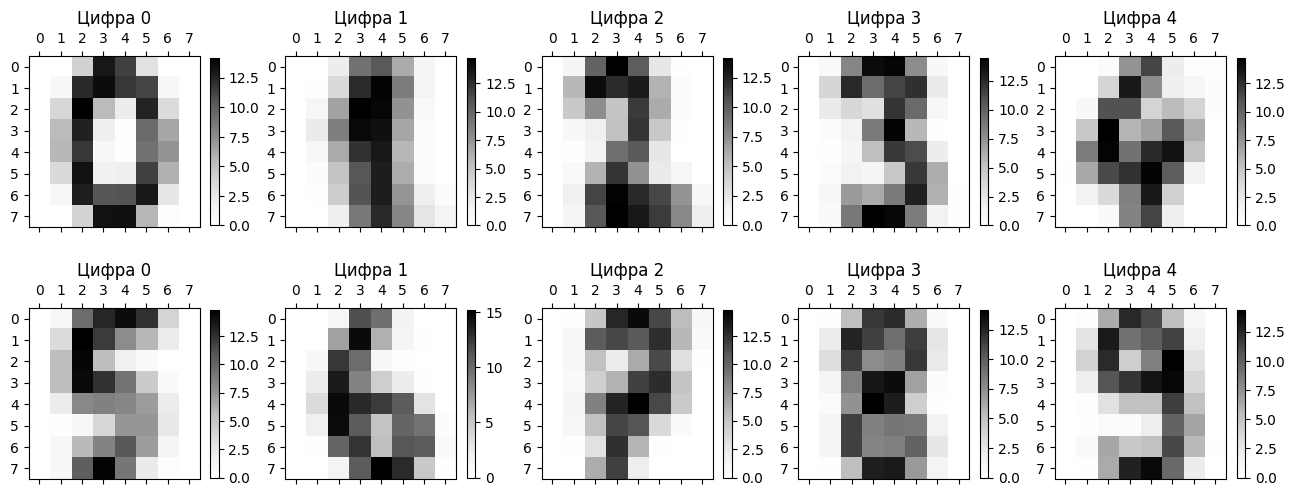

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # Импорт набора данных
# Создание полотна
fig, axs = plt.subplots(2, 5, figsize=(16, 6))

# Отображение изображений
for i in range(5):
  axs[0, i].set_title(f'Цифра {i}')
  im = axs[0, i].matshow(avg_images[0 + i].reshape(8,8), cmap='Grays')
  fig.colorbar(im, ax=axs[0, i], shrink=0.8)

for i in range(5):
  axs[1, i].set_title(f'Цифра {i}')
  im = axs[1, i].matshow(avg_images[5 + i].reshape(8,8), cmap='Grays')
  fig.colorbar(im, ax=axs[1, i], shrink=0.8)
plt.show()

In [54]:
NumberOfExamples = []
max_sum = []
min_sum = []
#Число примеров этой цифры:
for i in range(len(data_by_label)):
  lenarr = data_by_label[i].shape[0]
  NumberOfExamples.append(lenarr)
#Максимальная сумма:
for i in range(len(data_by_label)):
  lenarr = data_by_label[i]
  maxx = 0
  for i in range(len(lenarr)):
    if (lenarr[i].sum() > maxx):
      maxx = lenarr[i].sum()
  max_sum.append(maxx)
#Минимальная сумма:
for i in range(len(data_by_label)):
  lenarr = data_by_label[i]
  minn = 1000
  for i in range(len(lenarr)):
    if (lenarr[i].sum() < minn):
      minn = lenarr[i].sum()
  min_sum.append(minn)

print(NumberOfExamples)
print(max_sum)
print(min_sum)

[87, 95, 99, 112, 109, 96, 98, 97, 101, 106]
[399.0, 433.0, 368.0, 371.0, 351.0, 376.0, 395.0, 372.0, 409.0, 395.0]
[257.0, 185.0, 257.0, 256.0, 247.0, 226.0, 256.0, 251.0, 256.0, 257.0]


In [58]:
import pandas as pd
table = pd.DataFrame(columns = ['Число примеров',
                                'Максимальная сумма значений',
                                'Минимальная сумма значений'],
                                 index = [np.arange(10)])
table['Число примеров'] = NumberOfExamples
table['Максимальная сумма значений'] = max_sum
table['Минимальная сумма значений'] = min_sum
table

,Число примеров,Максимальная сумма значений,Минимальная сумма значений
0,87,399.0,257.0
1,95,433.0,185.0
2,99,368.0,257.0
3,112,371.0,256.0
4,109,351.0,247.0
5,96,376.0,226.0
6,98,395.0,256.0
7,97,372.0,251.0
8,101,409.0,256.0
9,106,395.0,257.0


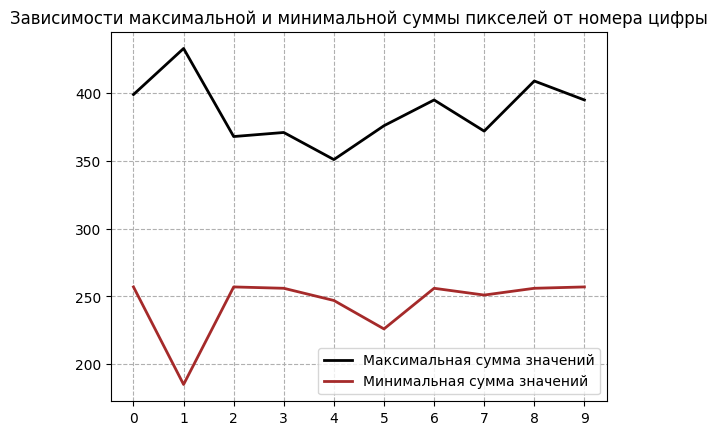

In [56]:
table['Максимальная сумма значений'].plot(linewidth = 2, color = 'black')
table['Минимальная сумма значений'].plot(linewidth = 2, color = 'brown')


plt.xticks(np.arange(10), np.arange(10))

ax = plt.gca()


ax.set_title('Зависимости максимальной и минимальной суммы пикселей от номера цифры')
ax.grid(True, linestyle = '--')
ax.legend()

plt.show()